In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image

import cv2

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Reading the zip file Extracting Train file
from zipfile import ZipFile

data_path = "/content/drive/MyDrive/Project Related Files/Dog Breed Dataset/train-20250303T114005Z-001.zip"

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print("The dataset has be extracted.")

The dataset has be extracted.


In [4]:
# Reading the zip file Extracting test file
from zipfile import ZipFile

data_path = "/content/drive/MyDrive/Project Related Files/Dog Breed Dataset/test-20250303T114004Z-001.zip"

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print("The dataset has be extracted.")

The dataset has be extracted.


In [5]:
# Path to label csv
labels = pd.read_csv("/content/drive/MyDrive/Project Related Files/Dog Breed Dataset/labels.csv")

#Path to the dataset
train_path = "/content/train"
test_path = "/content/test"

In [6]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
# Addign .jpg to all the id to identify it as an image
def to_jpg(id):
    return id+".jpg"

labels['id'] = labels['id'].apply(to_jpg)

In [12]:
# Data augmentation and pre-processing using tensorflow
gen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    validation_split = 0.2
)

train_generator = gen.flow_from_dataframe(
    labels,
    directory = train_path,
    x_col = 'id',
    y_col = 'breed',
    subset = 'training',
    color_mode = "rgb",
    target_size = (331, 331),
    class_mode = "categorical",
    batch_size = 32,
    shuffle = True,
    seed = 42,
)

test_generator = gen.flow_from_dataframe(
    labels,
    directory = train_path,
    x_col = 'id',
    y_col = 'breed',
    subset = 'validation',
    color = 'rgb',
    target_size = (331, 331),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
)

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [13]:
# Let's check out the batch size
x, y = next(train_generator)
x.shape

(32, 331, 331, 3)

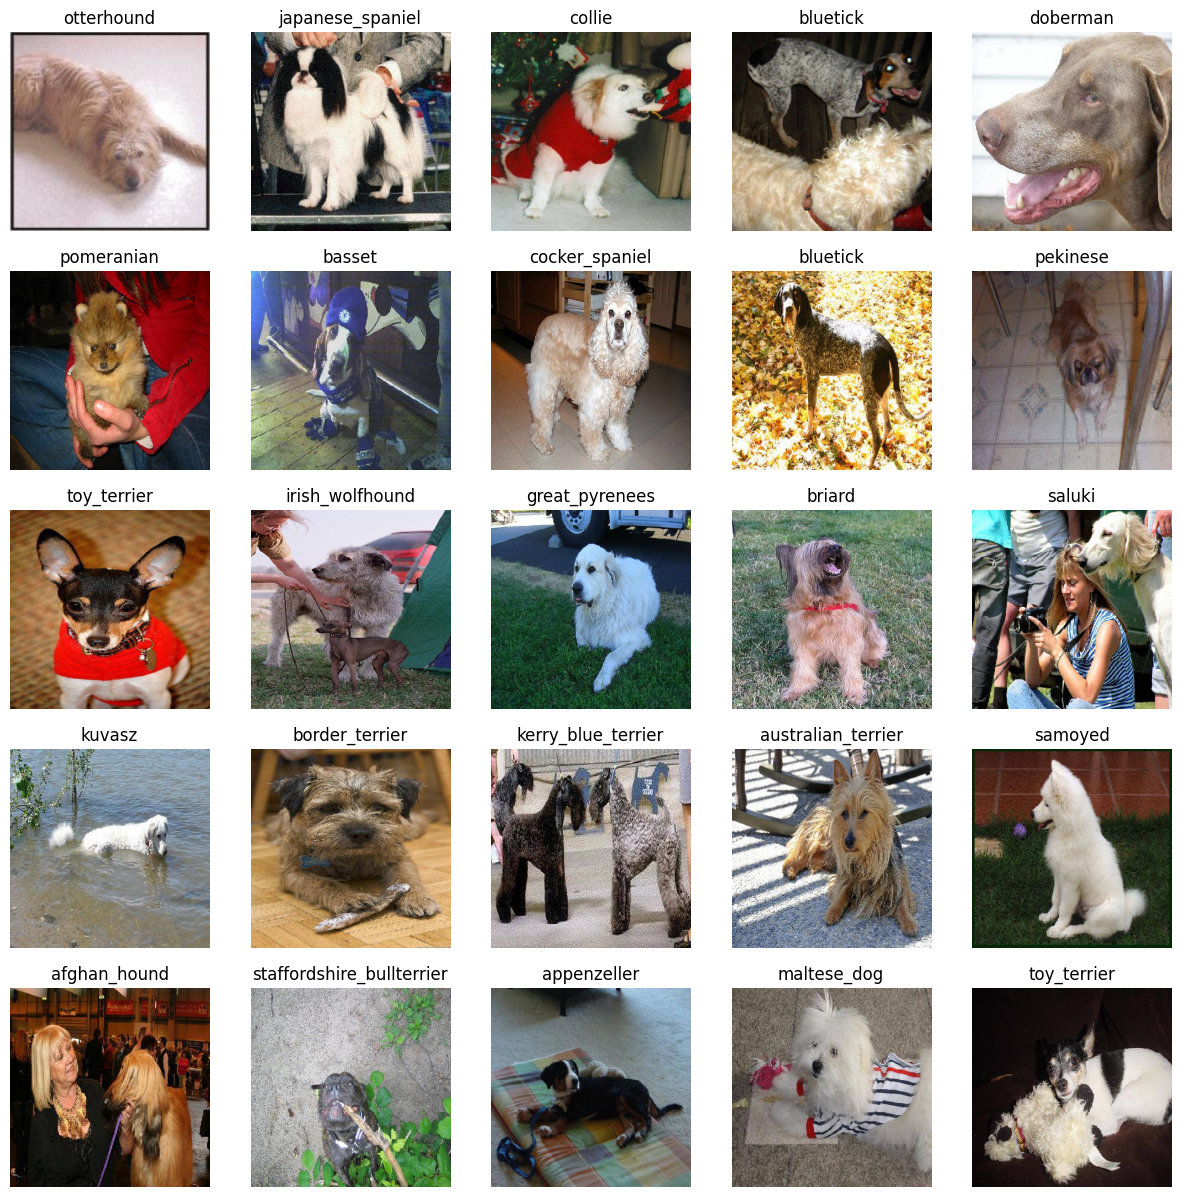

In [15]:
a = train_generator.class_indices
class_names = list(a.keys())

def plot_images(img, labels):
    plt.figure(figsize=[15,15])
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')

plot_images(x, y)